In [1]:
import seaborn.objects as so
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbgsom import DBGSOM
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.pipeline import Pipeline


## Read and format file

In [2]:
dataset = pd.read_csv("wahlomat_dataset.csv")
dataset = dataset.replace({"stimme zu": 1, "neutral": 0, "stimme nicht zu": -1})

parties = dataset.pivot(
    index="Partei: Kurzbezeichnung", columns="These: Titel", values="Position: Position"
)

statements = dataset.pivot(
    index="These: Titel", columns="Partei: Kurzbezeichnung", values="Position: Position"
)


In [7]:
som = DBGSOM(sf=0.95, n_epochs_max=100, metric="cosine", random_state=42)
som.fit(X=parties)


 71%|███████   | 71/100 [00:00<00:00, 71.41 epochs/s]


DBGSOM(metric='cosine', n_epochs_max=100, random_state=42, sf=0.95)

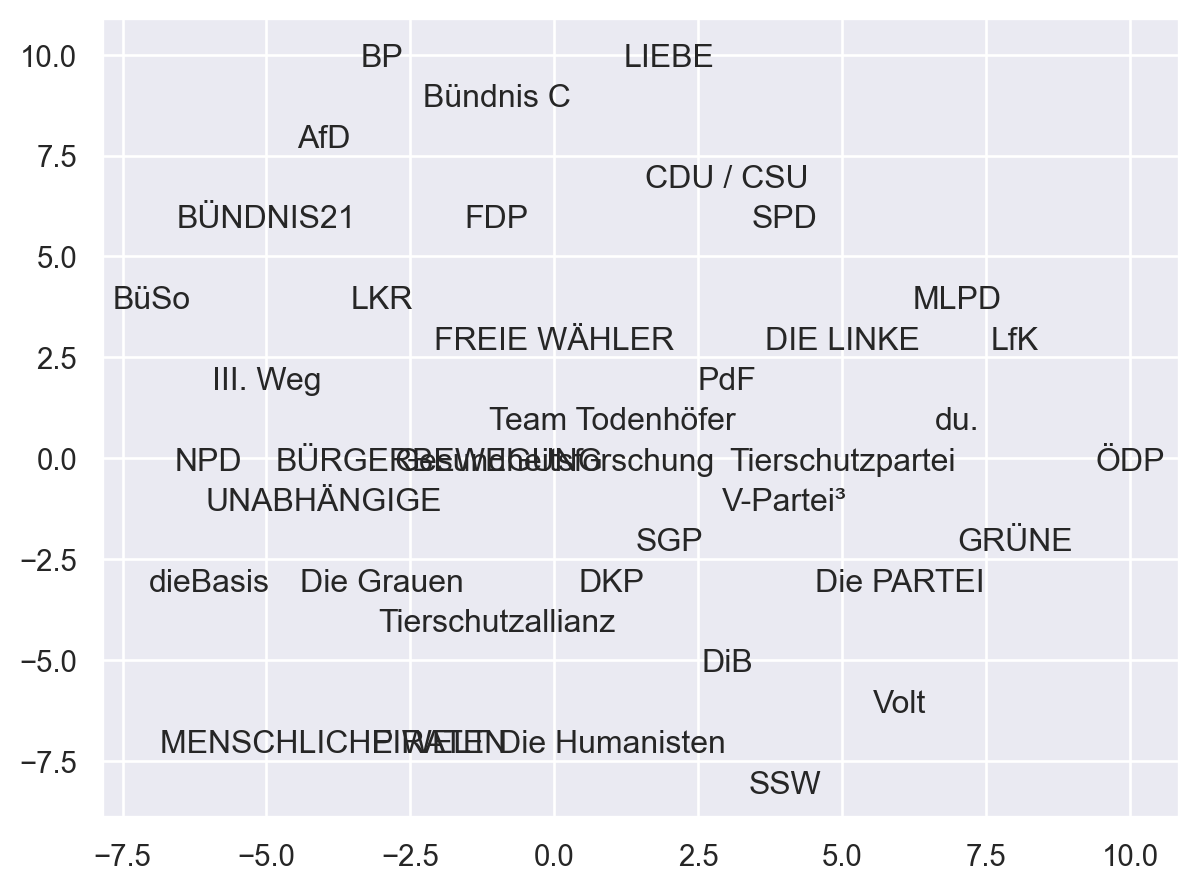

<Figure size 1000x1000 with 0 Axes>

In [8]:
plt.figure(figsize=(10, 10))
labels = som.labels_
so.Plot(
    x=np.array(som.neurons_)[labels, 0],
    y=np.array(som.neurons_)[labels, 1],
    text=parties.index
).add(so.Text(
    # color=[[colors[partei] for partei in parteien.index]]
    ))


### Colors for parties
(WiP)

In [9]:
from collections import defaultdict
def return_grey():
    return "grey"
colors = defaultdict(return_grey)

In [10]:
colors.update(
    {
        "GRÜNE": "green",
        "SPD": "red",
        "DIE LINKE": "red",
        "FPD": "yellow",
        "CDU/CSU": "black",
        "AfD": "blue",
    }
)
